# "Understanding The Data -- Minecraft Mining"
> "A Deep Dive into the Distribution of Blocks in Minecraft"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Josh Prier
- categories: [Minecraft, Understanding The Data, Data Science]

## What is the Optimal Method to Mine in Minecraft

To answer this question we must first collect data. To do this I created a minecraft mod that randomly teleports the player, samples a 500x50x500 (X,Y,Z) set of blocks around the player and logs those blocks into a csv. It repeats this a total of 10 times creating 10 samples of 500x50x500 blocks

The mod can be seen here: https://github.com/JPrier/MinecraftBlocksDistribution

### Data
Here we will use Pandas to read in the data to be used to visualize distributions.

In [1]:
#collapse-hide
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./distributionLogs/3122-data.csv', error_bad_lines=False)
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    print(df)

               X   Y      Z    Block  sample  playerX  playerY  playerZ
0          -5831   0   6935  bedrock       0  -5581.0     50.0   7185.0
1          -5830   0   6935  bedrock       0  -5581.0     50.0   7185.0
2          -5829   0   6935  bedrock       0  -5581.0     50.0   7185.0
3          -5828   0   6935  bedrock       0  -5581.0     50.0   7185.0
4          -5827   0   6935  bedrock       0  -5581.0     50.0   7185.0
...          ...  ..    ...      ...     ...      ...      ...      ...
128010505  13966  50 -10793    water       9  13720.0     50.0 -11043.0
128010506  13967  50 -10793    water       9  13720.0     50.0 -11043.0
128010507  13968  50 -10793    water       9  13720.0     50.0 -11043.0
128010508  13969  50 -10793    water       9  13720.0     50.0 -11043.0
128010509  13970  50 -10793    water       9  13720.0     50.0 -11043.0

[128010510 rows x 8 columns]


## Visualize Distributions
Here we want to visualize the blocks and their frequency

In [3]:
# Set dict of all blocks
block_dict = {}
print(df['Block'].unique())

['bedrock' 'stone' 'iron_ore' 'dirt' 'diorite' 'granite' 'andesite' 'lava'
 'coal_ore' 'redstone_ore' 'gravel' 'diamond_ore' 'lapis_ore' 'cave_air'
 'gold_ore' 'infested_stone' 'emerald_ore' 'water' 'oak_fence'
 'oak_planks' 'tall_grass' 'cobweb' 'rail' 'wall_torch' 'spawner'
 'brown_mushroom' 'azure_bluet' 'mossy_cobblestone' 'cobblestone' 'chest'
 'large_fern' 'sugar_cane' 'red_mushroom' 'poppy' 'dandelion' 'netherrack'
 'magma_block' 'stone_brick_stairs' 'stone_brick_slab' 'air'
 'cracked_stone_bricks' 'stone_bricks' 'stone_brick_wall' 'obsidian'
 'crying_obsidian' 'gold_block' 'chiseled_stone_bricks'
 'mossy_stone_brick_wall' 'rose_bush' 'bone_block' 'sandstone' 'sand'
 'tall_seagrass' 'seagrass' 'kelp_plant' 'kelp' 'mossy_stone_bricks'
 'sea_lantern' 'blue_orchid' 'clay' 'peony' 'lilac' 'cut_sandstone'
 'polished_granite' 'mossy_stone_brick_slab' 'mossy_stone_brick_stairs'
 'bricks' 'dark_oak_planks' 'spruce_planks' 'oak_stairs' 'spruce_fence'
 'spruce_stairs' 'oak_log' 'oak_trapd

In [7]:
# Get frequency of given block from Y value
print(df.keys())
df_block = df.loc[df['Block'] == 'diamond_ore']#.set_index(['Y']).count(level='Y')
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    print(df_block.groupby('Y')['Y'].transform('count'))
df_block['YBlockFreq'] = df_block.groupby('Y')['Y'].transform('count')

# iterate through Ys and grab YBlockFreq
y_list = df_block['Y'].unique()
for y in y_list:
    pass

with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    print(df_block)
    print(df_block.keys())
    
# block_dict['diamond_ore'] = df_block

Index(['X', 'Y', 'Z', 'Block', 'sample', 'playerX', 'playerY', 'playerZ'], dtype='object')
3043         3199
3044         3199
4186         3198
4187         3198
5716         2940
             ... 
127966198    2914
127989151    3198
127989652    3057
127991249    3054
127991749    2914
Name: Y, Length: 35319, dtype: int64
               X   Y      Z        Block  sample  playerX  playerY  playerZ  \
3043       -5794   6   6935  diamond_ore       0  -5581.0     50.0   7185.0   
3044       -5793   6   6935  diamond_ore       0  -5581.0     50.0   7185.0   
4186       -5653   8   6935  diamond_ore       0  -5581.0     50.0   7185.0   
4187       -5652   8   6935  diamond_ore       0  -5581.0     50.0   7185.0   
5716       -5626  11   6935  diamond_ore       0  -5581.0     50.0   7185.0   
...          ...  ..    ...          ...     ...      ...      ...      ...   
127966198  13747  13 -10794  diamond_ore       9  13720.0     50.0 -11043.0   
127989151  13654   8 -10793  diamond_ore  

c:\users\jkpri\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[]

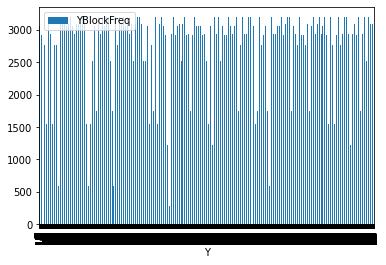

In [6]:
# Create distribution plots of block vs Y level
df_block.plot.bar(x='Y', y='YBlockFreq')
# Create HeatMaps of blocks with X-Z, X-Y, Y-Z, and 3d X-Y-Z

plt.plot()

## What is the best method
Now that we have the data and have seen the distributions of blocks through our samples lets see how different methods of mining do.

#### Calculating the best method
We will compare each of the methods based on these data points:
* Number of blocks mined
* Number of desired blocks mined

#### TODO (What to figure out)
* Should methods be done on every level and each be compared?
* If a player sees diamonds they will mine all of them, need to grab all visible ore

In [ ]:
# TODO
# Starting from the player calculate each of the methods at different starting levels. save each into a dataframe
def strip_mining():
    # +250X @ Y, Y+1, -250X @ Y, Y+1 -- repeat for +2Z, -2Z
    # 
    # Get range of coords. Should be an O(1) process by just selecting a set of blocks from coords given the player's starting location
    #
    # Create tuples [X, Y, Z] and get the blocks at those coords. Need to also grab all "visible" blocks (need a method to "mine")
    #
    #
    # Strip 1 xRange = [0, 250], yRange = [0, 1], zRange = [0]
    # repeat each 3 Z s.t. there are 2 blocks in between strips
    # Need zRange = [0, 3, 6, 9, ..., Z<=250]
    pass
    
# Calculate the frequency of blocks seen with each method at different levels
# Show the "Scores"